# Reading MATLAB `.mat` files

In one of the radiation lecture, you are asked to read files in the MATLAB `.mat` files (one file per day with vectors of `I` measured at
the surface at 450 nm, along with the sun elevation angle for each measurement `SNH`). There seem to be no time attached to these measurements. Here is an example of how to read one of the file into a pandas dataframe with help of the [scipy](https://docs.scipy.org) library:

## Reading mat files 

In [1]:
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import pandas as pd
import matplotlib.pyplot as plt

mat = loadmat('I_and_SNH_20111003.mat')

# Put all columns which are not weird MATLAB ones into a dataframe
df = pd.DataFrame()
for k in mat:
    if '__' in k:
        continue
    df[k] = mat[k].flatten()

# Name it "day1" for clarity
df_day1 = df
df_day1

,SNH,I_450
0,10.028338,0.238662
1,10.838524,0.282054
2,11.646388,0.321627
3,12.446173,0.361128
4,13.246367,0.398293
...,...,...
109,13.503050,0.485676
110,12.684507,0.442991
111,11.890372,0.395319
112,11.071531,0.343366


## Plots 

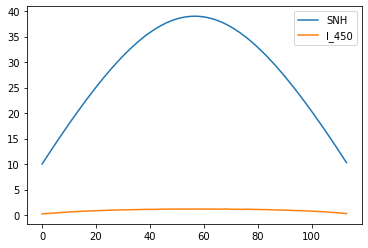

In [2]:
df_day1.plot();

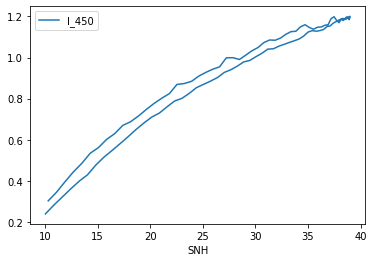

In [3]:
df_day1.plot(x='SNH', y='I_450');

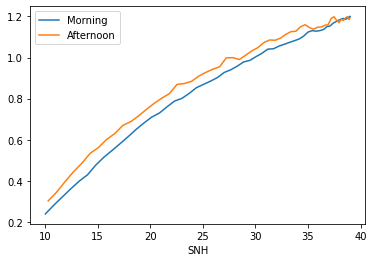

In [4]:
df_day1_morning = df_day1.loc[:df_day1['SNH'].argmax()]
df_day1_afternoon = df_day1.loc[df_day1['SNH'].argmax()+1:]

f, ax = plt.subplots()
df_day1_morning.plot(x='SNH', y='I_450', ax=ax, label='Morning');
df_day1_afternoon.plot(x='SNH', y='I_450', ax=ax, label='Afternoon');

## Merge several days into one dataframe 

In [11]:
import glob

all_df = []
for f in sorted(glob.glob('*.mat')):

    mat = loadmat(f)

    # Put all columns which are not weird MATLAB ones into a dataframe
    df = pd.DataFrame()
    for k in mat:
        if '__' in k:
            continue
        df[k] = mat[k].flatten()
    df['date'] = f.split('_')[-1].split('.')[0]

    all_df.append(df)

all_df = pd.concat(all_df, ignore_index=True)
all_df

,SNH,I_450,date
0,10.028338,0.238662,20111003
1,10.838524,0.282054,20111003
2,11.646388,0.321627,20111003
3,12.446173,0.361128,20111003
4,13.246367,0.398293,20111003
...,...,...,...
450,16.725457,0.630984,20120514
451,15.535872,0.577296,20120514
452,14.617152,0.532635,20120514
453,13.705881,0.487820,20120514


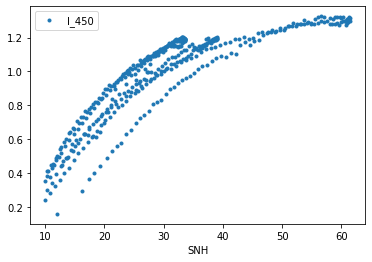

In [9]:
all_df.plot(x='SNH', y='I_450', style='.');